# Face detection and recognition

Opencv detector와 keras classifier로 얼굴인식을 구현합니다.

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (8,6)

In [2]:
face_cascade_ocv = cv2.CascadeClassifier('./models/opencv-cascade/haarcascade_frontalface_alt.xml')

In [3]:
img_bgr = cv2.imread('./data/celeb.png', 1)
show = img_bgr.copy()
# image shape = (height, width, channel)
print (img_bgr.shape)

(540, 960, 3)


In [4]:
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
bbox_faces = face_cascade_ocv.detectMultiScale(img_gray, 1.3, 5) # x,y,w,h

In [5]:
for (x,y,w,h) in bbox_faces:
    cv2.rectangle(show, (x,y),(x+w,y+h), (128,255,0),2)
    # cropped_img = img_bgr[x:x+w, y:y+h]
    cropped_img = img_bgr[y:y+h, x:x+w]

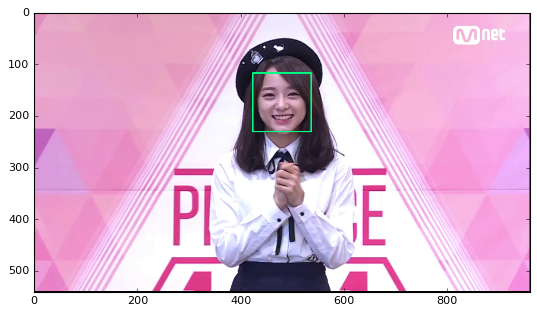

In [6]:
show = cv2.cvtColor(show, cv2.COLOR_BGR2RGB)
plt.imshow(show)
plt.show()

In [7]:
### classification
from keras.models import Model, model_from_json
import keras

Using TensorFlow backend.


In [8]:
with open('./models/xception/model.json', 'r') as json_file:
    loaded_model_json = json_file.read()
model = model_from_json(loaded_model_json)
model.load_weights('models/xception/weights.79.h5')

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 48, 48, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 23, 23, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 23, 23, 32)   128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 23, 23, 32)   0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
conv2d_2 (

In [9]:
### model input
resized_img = cv2.resize(cropped_img, (48,48))
img_bgr_float = resized_img.astype(np.float32)
img_bgr_float_normalized = 2*(img_bgr_float - 128)/255

### make gray 3ch for xception network
img_cropgray_1ch = cv2.cvtColor(img_bgr_float_normalized, cv2.COLOR_BGR2GRAY)
img_cropgray_3ch = cv2.cvtColor(img_cropgray_1ch, cv2.COLOR_GRAY2BGR)

[  4.29528271e-08   9.99998093e-01   3.03957703e-09   1.93658616e-06
   6.38672379e-11   2.10322981e-09   7.70031239e-09   1.72321624e-09]
label: happiness


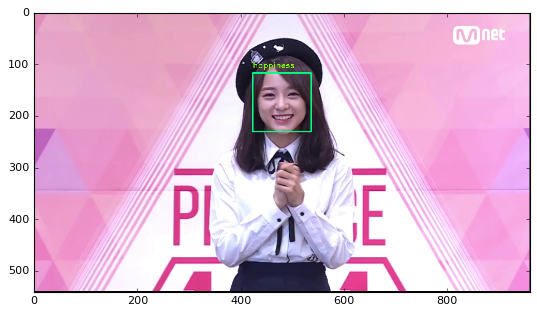

In [10]:
img_input = np.expand_dims(img_cropgray_3ch, 0)

result = model.predict(img_input, 1)

# result is a softmax value of emotion labels
# the order is same with below dictionary datat
print (result[0])

# final label is a order of maximum value
predict_label = np.argmax(result[0])

dict_emotion_label = {0:'neutral',1:'happiness',2:'surprise',
                      3:'sadness',4:'anger',5:'disgust',
                      6:'fear',7:'contempt',9:'unknown'}

print ('label: %s'%dict_emotion_label[predict_label])

# cv2.imshow('crop', cropped_img)
# cv2.imshow('show', show)
# cv2.waitKey()
cv2.putText(show, '%s'%dict_emotion_label[predict_label], 
            (bbox_faces[0][0], bbox_faces[0][1]-10),
            cv2.FONT_HERSHEY_DUPLEX, 
            0.5, 
            (127,255,0))
plt.imshow(show)
plt.show()